<a href="https://colab.research.google.com/github/Alpha-lab12/Alpha-careers-website/blob/main/Swahili_News_Classification_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining The Question.

## a) Specifying the Question

Develop a multi-class classification model to classify news content according to their specific categories specified.

The model can be used by Swahili online news platforms to automatically group news according to their categories and help readers find the specific news they want to read. In addition, the model will contribute to a body of work ensuring that Swahili is represented in apps and other online products in future.


## b) Defining the Metric for Success

This project will be successful when:

1)We develop a multi-class classification model to classify news content according to their specific categories specified.

2)The model achieves atleast 80% accuracy


## c) Understanding the context

Swahili is spoken by 100-150 million people across East Africa.
News contributes to education, technology, and economic growth of a country, and news in local languages plays an important cultural role in many Africa countries. In the modern age, African languages in news and other spheres are at risk of being lost as English becomes the dominant language in online spaces.


## d) Recording the Experimental Design

The following are the experimental design i took in order to complete this project:

1. Loading the datasets
2. Understanding features and target variables

3. Data Cleaning
4. WordCloud
5. Label Encoding
6. Word Embedding
7. Building Models:

Random Forest classifier , KNeighbors Classifier, Multinomial Naive Bayes, Multilayer Perception Classifier
8. Validation
9. Conclusion

## e) Data Relevance

The dataset describes 5151 rows of news from different sources in Tanzania.These news are in 5 different news categories;

Kitaifa (National)

Kimataifa (International)

Biashara (Business)

Michezo (Sports)

Burudani (Entertainment)


Dataset Source
Description: https://zindi.africa/hackathons/swahili-news-classification-challenge/data.

Dataset link: [Swahili News Classification](https://drive.google.com/drive/folders/1LNlPGUzKI0apblUVa3xQlGtrc0gYkyKZ?usp=sharing)

## Introduction

This google colaboratory entails an anlysis on how we can use deep learning on Natural Language Processing (NLP) to classify Daily News as either

Kitaifa (National)

Kimataifa (International)

Biashara (Business)

Michezo (Sports)

Burudani (Entertainment)

The best application of this machiene learning model would be in the writing of daily news papers. Writing news papers must be tasky from typing the information to classfying it as whether it suits to be in the sports category, international news category among many others. This model then seeks to ease such a task by helping in classification once the information is keyed in by easily indenifity he relevant category of the information typed.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [8]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [10]:
test.tail()

,swahili_id,content
1283,feb4b0ae88524c9cee3e50f2301d84a235f3c607,MKURUGENZI Msaidizi Msajili wa Asasi za kirai...
1284,fecf3f14f47237e02721ed4baa4eb6c11abd239f,Kilomoni alisema jana kesho atazungumzia sual...
1285,feed09e13586d12139cd59bc20996a4d29706606,"TIMU ya taifa ya soka ya Tanzania Bara, Kilim..."
1286,ffc0bca6fde8fa0cce1ac3a7b0d746603d441bf8,"YANGA imetozwa faini ya Sh 3,500,000 kutokana..."
1287,fffdd6f356ed5b8dba21717f60c53f6520e650ab,MAHAKAMA Kuu Kanda ya Dar es Salaam imekubali...


# Understanding Features and Target Variables

In [11]:
train['category'].unique()

array(['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani'],
      dtype=object)

In [12]:
train.shape

(5151, 3)

In [9]:
train.dtypes

,0
id,object
content,object
category,object


# Checking for NULL values

In [13]:
train.isnull().any()

,0
id,False
content,False
category,False


# Countplot of Target Variable(Category)

<Axes: xlabel='count', ylabel='category'>

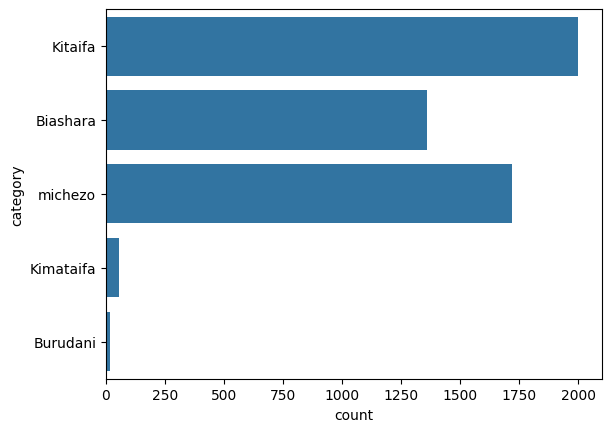

In [14]:
sns.countplot(train.category)

In [15]:
train['News_length'] = train['content'].str.len()
print(train['News_length'])

0       1584
1       1317
2       2610
3       1404
4       2247
        ... 
5146    6742
5147    2348
5148    3014
5149    1216
5150    1889
Name: News_length, Length: 5151, dtype: int64


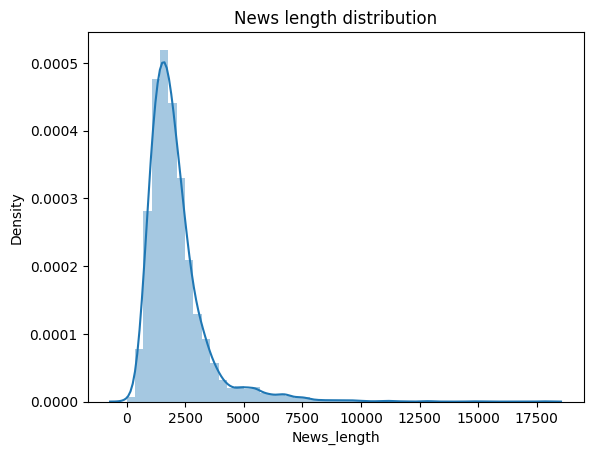

In [13]:
sns.distplot(train['News_length']).set_title('News length distribution');


# Data Cleaning

Removing the special characters

Removing Punctuations and Stopwords

In [17]:
train['content']=train['content'].str.lower()
train['content']=train['content'].str.replace("[^a-zA-Z]"," ") # removes everyting except alphabet (small and caps)



In [18]:
train.head()

,id,content,category,News_length
0,SW0,serikali imesema haitakuwa tayari kuona amani...,Kitaifa,1584
1,SW1,"mkuu wa mkoa wa tabora, aggrey mwanri amesiti...",Biashara,1317
2,SW10,serikali imetoa miezi sita kwa taasisi zote z...,Kitaifa,2610
3,SW100,kampuni ya mchezo wa kubahatisha ya m-bet ime...,michezo,1404
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu...,Kitaifa,2247


In [24]:
# 1. Import NLTK
import nltk
from nltk.tokenize import word_tokenize

# 2. Set a safe download directory for Colab
nltk.download('punkt', download_dir='/content/nltk_data')

# 3. Manually append that directory to nltk's search path
nltk.data.path.append('/content/nltk_data')

# 4. Example tokenization (assuming `train['content']` is a pandas DataFrame column)
word = [word_tokenize(i, language='swahili') for i in train['content']]

print(word[:5])


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/swahili/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/content/nltk_data'
    - '/content/nltk_data'
    - '/content/nltk_data'
    - '/content/nltk_data'
**********************************************************************


In [20]:
# creating swahili stopwords list
filter_sent=[]
stopwords_swahili=["akasema","alikuwa","amesema","alisema","ambayo","ambapo","ambao","baada","basi","bila","cha","chini","hadi","hapo","hata",
                   "hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila",
                   "kima","kisha","kubwa","kutoka","kutokana","kwani","kuwa","kwa","kwamba","kwenda","kwenye","la",
                   "lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na",
                   "naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti",
                   "tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine",
                   "wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]
for i in word:
    l=[]
    for j in i:
        if j not in stopwords_swahili:
            l.append(j) # This method appends an element to the end of the list
    filter_sent.append(' '.join(l))

NameError: name 'word' is not defined

In [ ]:
train['content']=filter_sent

In [ ]:
train.tail()

,id,content,category,News_length
5146,SW993,rais john magufuli ameendelea kung ara siasa k...,Kitaifa,6742
5147,SW994,kampeni inayohimiza watafi ti kuandika upya hi...,Kitaifa,2348
5148,SW996,matukio mapya malaria jamii yamepungua asilimi...,Kitaifa,3014
5149,SW997,imeelezwa hakuna sheria yoyote inayokataza taa...,Kitaifa,1216
5150,SW999,akizungumza kutiwa saini makubaliano hayo jana...,Biashara,1889


# WordCloud

A wordcloud is an image composed of words used in a particular text or subject in wich size of each word indicates its frequency or importance of that particular word.

In [18]:
#function to create wordcloud
def create_wordcloud(words):  # takes input as string
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

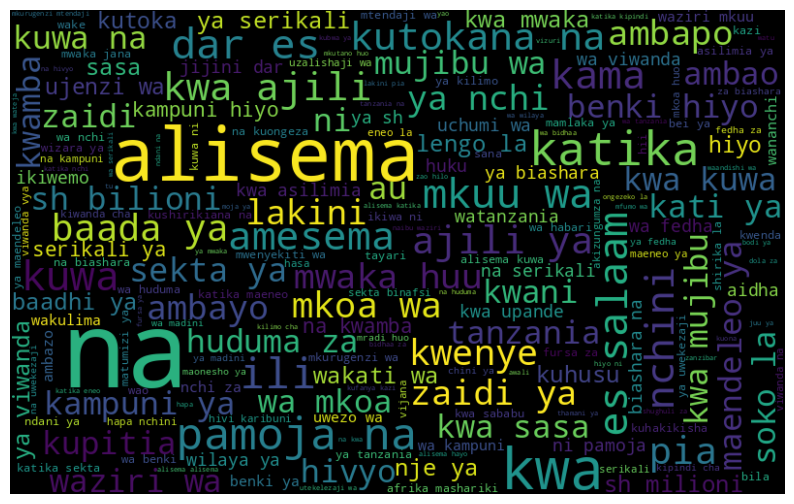

In [19]:
# wordcloud for category Biashara
subset=train[train.category=="Biashara"]
text=subset.content.values # list of sentences
words =" ".join(text)# convert list of sentences into a paragraph of sentences
create_wordcloud(words)

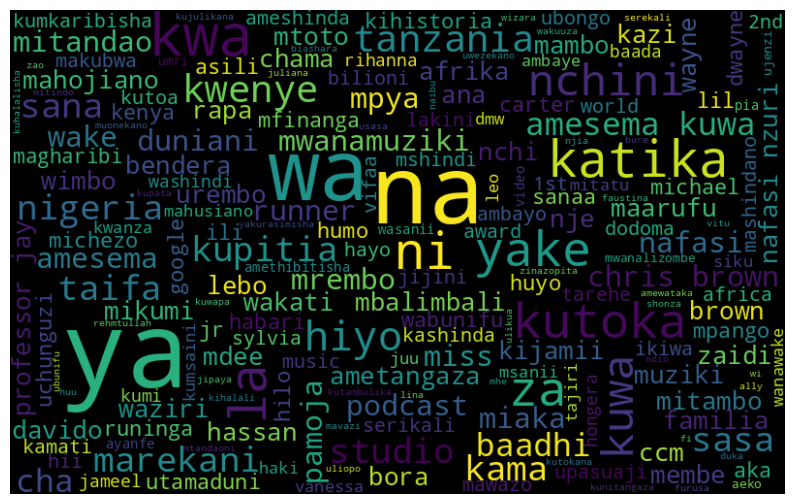

In [20]:
subset=train[train.category=="Burudani"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

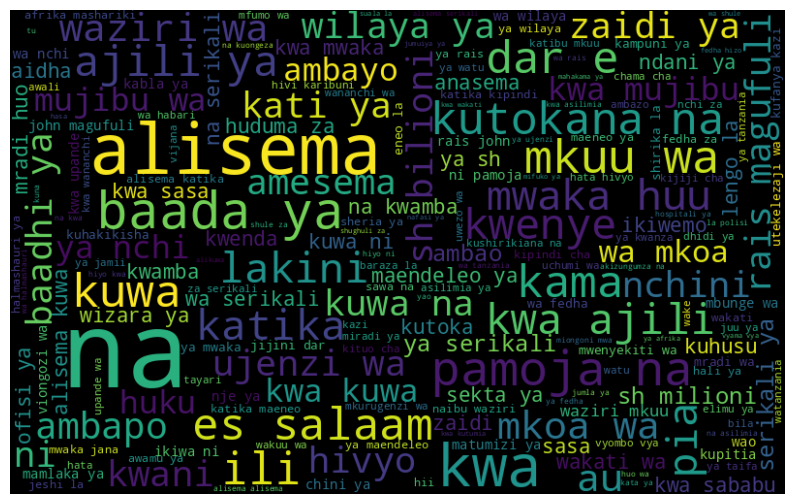

In [21]:
subset=train[train.category=="Kitaifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

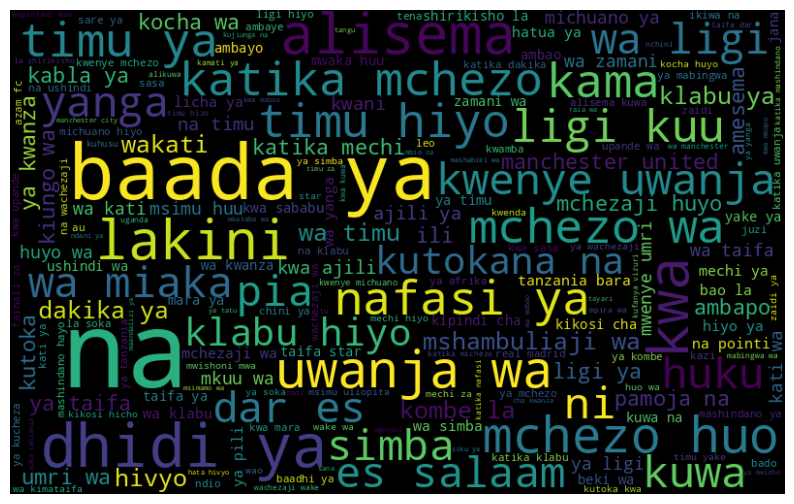

In [22]:
subset=train[train.category=="michezo"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

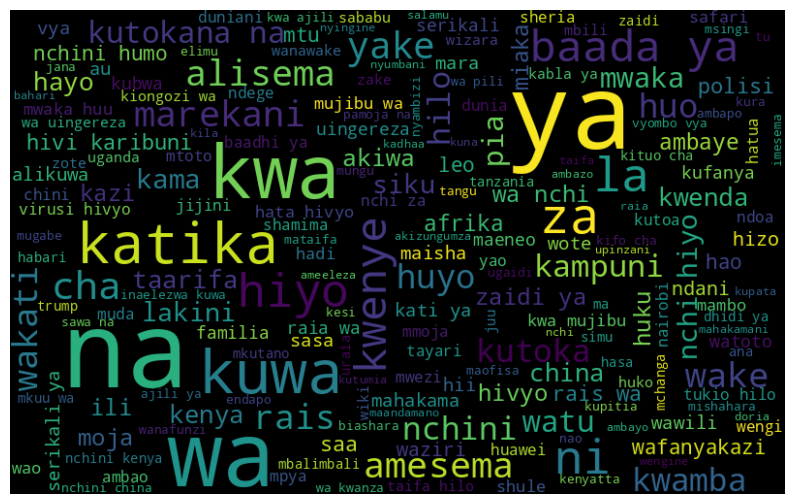

In [23]:
subset=train[train.category=="Kimataifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

# Label Encoding

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['category1']= label_encoder.fit_transform(train['category'])
train.head()

,id,content,category,category1
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,3
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,0
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,3
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,4
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,3


# Split the data in Training and testing

In [33]:
# text preprocessing
X_train, X_test, y_train, y_test = train_test_split(train['content'],
                                                    train['category1'],
                                                    test_size=0.3,
                                                    random_state=42)


  ## Word Embedding

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

TF-IDF
Short term for Term Frequency - Inverse Document Frequency. It breaks a word into two parts TF and IDF.
TF  : Total number of times a term occurs in a document but it tends to emphasize the wrong term sometimes, hence IDF is introduced to balance the term weight.

In [34]:
#Parameters
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [35]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2', # L2 normalization
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(3605, 300)
(1546, 300)


# Building Models

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8363518758085382
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.75      0.88      0.81       579
           4       0.96      0.91      0.93       532

    accuracy                           0.84      1546
   macro avg       0.51      0.50      0.50      1546
weighted avg       0.84      0.84      0.83      1546



In [37]:
model.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [38]:
 print('Accuracy: ', accuracy_score(labels_test, model_predictions))
 pd.crosstab(labels_test,model_predictions)


Accuracy:  0.8363518758085382


col_0,0,3,4
category1,,,
0,300,119,3
1,0,1,1
2,1,6,4
3,54,511,14
4,8,42,482


From category 0, 317 out of 477 were correctly classified

From category 3, 485 out of 579 were correctly classified

From Category 4,496 ot of 532 were correctly classified


Precision: A measure of a classifiers exactness.

Recall: A measure of a classifiers completeness

F1 Score (or F-score): A weighted average of precision and recall.

#Random over_sampling Imbalanced Datasets(Smote)


In [39]:
!pip install imblearn

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

features_train_smote, labels_train_smote = smote.fit_resample(features_train.astype("float"),labels_train)

In [44]:
from collections import Counter
print('Before SMOTE :' , Counter(labels_train))
print('After SMOTE :' , Counter(labels_train_smote))



Before SMOTE : Counter({3: 1421, 4: 1188, 0: 938, 2: 43, 1: 15})
After SMOTE : Counter({3: 1421, 0: 1421, 4: 1421, 1: 1421, 2: 1421})


In [45]:
model  = RandomForestClassifier(random_state=1)
model.fit(features_train_smote,labels_train_smote)
y_predict = model.predict(features_test)
print(accuracy_score(labels_test,y_predict))
print(classification_report(labels_test, y_predict))



0.8182406209573092
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       422
           1       1.00      0.50      0.67         2
           2       0.67      0.18      0.29        11
           3       0.74      0.84      0.79       579
           4       0.96      0.89      0.93       532

    accuracy                           0.82      1546
   macro avg       0.83      0.63      0.68      1546
weighted avg       0.82      0.82      0.82      1546



In [46]:
 print('Accuracy:',accuracy_score(labels_test,y_predict))
 pd.crosstab(labels_test,y_predict)

Accuracy: 0.8182406209573092


col_0,0,1,2,3,4
category1,,,,,
0,299,0,0,121,2
1,0,1,1,0,0
2,0,0,2,7,2
3,77,0,0,487,15
4,10,0,0,46,476


After balancing the datasets; The true positives of the five categories are as shown:

0-  328

1-  0

2-  6

3-  469

4-  504


## Hyper Paramater Tuning(Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

In [ ]:
bestF.best_params_

In [ ]:
# applying the hyperparameters
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

# KNeighborsClassifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8046571798188874
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.76      0.79      0.77       579
           4       0.93      0.92      0.92       532

    accuracy                           0.80      1546
   macro avg       0.48      0.48      0.48      1546
weighted avg       0.80      0.80      0.80      1546



In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [48]:
 print('Accuracy: ', accuracy_score(labels_test, model_predictions))
 pd.crosstab(labels_test,model_predictions)

Accuracy:  0.8046571798188874


col_0,0,1,2,3,4
category1,,,,,
0,301,0,0,113,8
1,0,0,0,1,1
2,4,0,0,3,4
3,99,1,1,455,23
4,15,0,0,29,488


# After balancing the dataset

In [49]:
model  = KNeighborsClassifier()
model.fit(features_train_smote,labels_train_smote)
y_predict = model.predict(features_test)
print(accuracy_score(labels_test,y_predict))
print(classification_report(labels_test, y_predict))

0.573738680465718
              precision    recall  f1-score   support

           0       0.49      0.90      0.63       422
           1       0.01      0.50      0.01         2
           2       0.06      0.64      0.12        11
           3       0.93      0.16      0.27       579
           4       0.96      0.77      0.85       532

    accuracy                           0.57      1546
   macro avg       0.49      0.59      0.38      1546
weighted avg       0.81      0.57      0.57      1546



In [50]:
 print('Accuracy:', accuracy_score(labels_test,y_predict))
 pd.crosstab(labels_test,y_predict)

Accuracy: 0.573738680465718


col_0,0,1,2,3,4
category1,,,,,
0,380,28,8,6,0
1,0,1,1,0,0
2,0,4,7,0,0
3,345,46,78,91,19
4,54,53,16,1,408


## Hyper Paramaters Tuning (KNeighborsClassifier)

In [ ]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

In [ ]:
bestF.best_params_

In [ ]:
# Applying the best parameter

model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

# Multinomial Naive Bayes

The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.7755498059508409
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       422
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.65      0.88      0.75       579
           4       0.97      0.87      0.91       532

    accuracy                           0.78      1546
   macro avg       0.48      0.46      0.46      1546
weighted avg       0.79      0.78      0.77      1546



In [52]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

## Hyper Parameter Tuning(Multinomial Naive Bayes)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha': [1, 1e-1, 1e-2]

}
gridF = GridSearchCV(model, parameters, cv=10,verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [ ]:
bestF.best_params_

{'alpha': 0.01}

# BOW + Xgboost Model

Boosting models are another type of ensemble models part of tree based models. Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing).


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [54]:
count_vect = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}')
count_vect.fit(train['content'])
train1_trans = count_vect.transform(train['content'].values)
labels = train['category1'].values
X = scipy.sparse.hstack([train1_trans])
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_valid)

In [56]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

training score: 0.9817589479273948
validation score: 0.6552449110004207
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       466
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00        11
           3       0.81      0.87      0.84       632
           4       0.96      0.96      0.96       589

    accuracy                           0.87      1700
   macro avg       0.72      0.62      0.66      1700
weighted avg       0.87      0.87      0.87      1700



In [57]:
print('Accuracy: ', accuracy_score(y_valid, xgb_prediction))
pd.crosstab(y_valid, xgb_prediction)





Accuracy:  0.8705882352941177


col_0,0,1,3,4
row_0,,,,
0,365,0,100,1
1,0,1,1,0
2,2,0,5,4
3,62,0,551,19
4,6,0,20,563


# After Balancing the dataset

In [58]:
model  = xgb_model
model.fit(features_train_smote,labels_train_smote)
y_predict = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,y_predict))
pd.crosstab(labels_test,y_predict)

Accuracy: 0.8369987063389392


col_0,0,1,2,3,4
category1,,,,,
0,323,1,1,92,5
1,0,1,1,0,0
2,1,0,6,2,2
3,84,1,4,473,17
4,8,0,1,32,491


Word level TF-IDF

In [59]:
tfidf_vect = TfidfVectorizer(analyzer='word',ngram_range=(2,3), token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(train['content'])
train_trans1 = tfidf_vect.transform(train['content'].values)
labels = train['category1'].values
X = scipy.sparse.hstack([train_trans1])
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [60]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_valid)
print('word level tf-idf training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('word level tf-idf validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

word level tf-idf training score: 0.9408923063389383
word level tf-idf validation score: 0.5021450243439863
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       466
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.77      0.85      0.81       632
           4       0.95      0.94      0.95       589

    accuracy                           0.84      1700
   macro avg       0.50      0.50      0.50      1700
weighted avg       0.83      0.84      0.84      1700



N-gram Level TF-IDF

In [61]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(train['content'])
train_trans1 = tfidf_vect_ngram.transform(train['content'].values)
labels = train['category1'].values
X = scipy.sparse.hstack([train_trans1])
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 4)

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_valid)
print('n-gram level tf-idf training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('n-gram level tf-idf validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

Character Level TF-IDF

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(train['content'])
train_trans1 = tfidf_vect_ngram_chars.transform(train['content'].values)
labels = train['category1'].values
X = scipy.sparse.hstack([train_trans1])
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_valid)
print('character level tf-idf training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('character level tf-idf validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

character level tf-idf training score: 0.9848736102629608
character level tf-idf validation score: 0.5189216223606183
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       466
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        11
           3       0.82      0.86      0.84       632
           4       0.95      0.95      0.95       589

    accuracy                           0.87      1700
   macro avg       0.52      0.52      0.52      1700
weighted avg       0.86      0.87      0.86      1700



In [22]:
import re

# Tokenize using regular expressions
word = [re.findall(r'\b\w+\b', i) for i in train['content']]

# Display the first few tokenized news articles
print(word[:5])

[['serikali', 'imesema', 'haitakuwa', 'tayari', 'kuona', 'amani', 'na', 'utulivu', 'wa', 'nchi', 'inachezewa', 'huku', 'ikisisitiza', 'uwepo', 'wa', 'umoja', 'kati', 'ya', 'wananchi', 'bila', 'kujali', 'tofauti', 'ya', 'imani', 'kabila', 'au', 'itikadi', 'yoyote', 'hayo', 'yalisemwa', 'na', 'naibu', 'waziri', 'wa', 'mambo', 'ya', 'ndani', 'ya', 'nchi', 'hamad', 'yussuf', 'masauni', 'wakati', 'akifungua', 'semina', 'ya', 'siku', 'mbili', 'iliyofanyika', 'jijini', 'dar', 'es', 'salaam', 'ikiwahusisha', 'viongozi', 'wa', 'taasisi', 'za', 'kiislamu', 'lengo', 'ikiwa', 'ni', 'kuwakumbusha', 'kuhubiri', 'amani', 'katika', 'sehemu', 'zao', 'naibu', 'waziri', 'amesema', 'mwelekeo', 'na', 'malengo', 'ya', 'serikali', 'ya', 'awamu', 'ya', 'tano', 'ni', 'kukuza', 'maendeleo', 'katika', 'sehemu', 'mbalimbali', 'nchini', 'lengo', 'ikiwa', 'kuinua', 'maisha', 'ya', 'wananchi', 'na', 'nchi', 'kwa', 'ujumla', 'serikali', 'hii', 'imejidhatiti', 'kuhakikisha', 'maendeleo', 'yanakuja', 'kwa', 'kasi', 'na

In [23]:
import re

# Tokenize using regular expressions
word = [re.findall(r'\b\w+\b', i) for i in train['content']]

# Display the first few tokenized news articles
print(word[:5])

[['serikali', 'imesema', 'haitakuwa', 'tayari', 'kuona', 'amani', 'na', 'utulivu', 'wa', 'nchi', 'inachezewa', 'huku', 'ikisisitiza', 'uwepo', 'wa', 'umoja', 'kati', 'ya', 'wananchi', 'bila', 'kujali', 'tofauti', 'ya', 'imani', 'kabila', 'au', 'itikadi', 'yoyote', 'hayo', 'yalisemwa', 'na', 'naibu', 'waziri', 'wa', 'mambo', 'ya', 'ndani', 'ya', 'nchi', 'hamad', 'yussuf', 'masauni', 'wakati', 'akifungua', 'semina', 'ya', 'siku', 'mbili', 'iliyofanyika', 'jijini', 'dar', 'es', 'salaam', 'ikiwahusisha', 'viongozi', 'wa', 'taasisi', 'za', 'kiislamu', 'lengo', 'ikiwa', 'ni', 'kuwakumbusha', 'kuhubiri', 'amani', 'katika', 'sehemu', 'zao', 'naibu', 'waziri', 'amesema', 'mwelekeo', 'na', 'malengo', 'ya', 'serikali', 'ya', 'awamu', 'ya', 'tano', 'ni', 'kukuza', 'maendeleo', 'katika', 'sehemu', 'mbalimbali', 'nchini', 'lengo', 'ikiwa', 'kuinua', 'maisha', 'ya', 'wananchi', 'na', 'nchi', 'kwa', 'ujumla', 'serikali', 'hii', 'imejidhatiti', 'kuhakikisha', 'maendeleo', 'yanakuja', 'kwa', 'kasi', 'na

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

In [26]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [29]:
import re

# Tokenize using regular expressions
word = [re.findall(r'\b\w+\b', i) for i in train['content']]

# Display the first few tokenized news articles
print(word[:5])

[['SERIKALI', 'imesema', 'haitakuwa', 'tayari', 'kuona', 'amani', 'na', 'utulivu', 'wa', 'nchi', 'inachezewa', 'huku', 'ikisisitiza', 'uwepo', 'wa', 'umoja', 'kati', 'ya', 'wananchi', 'bila', 'kujali', 'tofauti', 'ya', 'imani', 'kabila', 'au', 'itikadi', 'yoyote', 'Hayo', 'yalisemwa', 'na', 'Naibu', 'Waziri', 'wa', 'Mambo', 'ya', 'Ndani', 'ya', 'Nchi', 'Hamad', 'Yussuf', 'Masauni', 'wakati', 'akifungua', 'semina', 'ya', 'siku', 'mbili', 'iliyofanyika', 'jijini', 'Dar', 'es', 'Salaam', 'ikiwahusisha', 'viongozi', 'wa', 'taasisi', 'za', 'Kiislamu', 'lengo', 'ikiwa', 'ni', 'kuwakumbusha', 'kuhubiri', 'amani', 'katika', 'sehemu', 'zao', 'Naibu', 'Waziri', 'amesema', 'mwelekeo', 'na', 'malengo', 'ya', 'Serikali', 'ya', 'Awamu', 'ya', 'Tano', 'ni', 'kukuza', 'maendeleo', 'katika', 'sehemu', 'mbalimbali', 'nchini', 'lengo', 'ikiwa', 'kuinua', 'maisha', 'ya', 'wananchi', 'na', 'nchi', 'kwa', 'ujumla', 'Serikali', 'hii', 'imejidhatiti', 'kuhakikisha', 'maendeleo', 'yanakuja', 'kwa', 'kasi', 'na

In [30]:
# creating swahili stopwords list
filter_sent=[]
stopwords_swahili=["akasema","alikuwa","amesema","alisema","ambayo","ambapo","ambao","baada","basi","bila","cha","chini","hadi","hapo","hata",
                   "hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila",
                   "kima","kisha","kubwa","kutoka","kutokana","kwani","kuwa","kwa","kwamba","kwenda","kwenye","la",
                   "lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na",
                   "naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti",
                   "tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine",
                   "wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]
for i in word:
    l=[]
    for j in i:
        if j not in stopwords_swahili:
            l.append(j) # This method appends an element to the end of the list
    filter_sent.append(' '.join(l))